<a href="https://colab.research.google.com/github/Vankum100/colabs/blob/bms-test/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

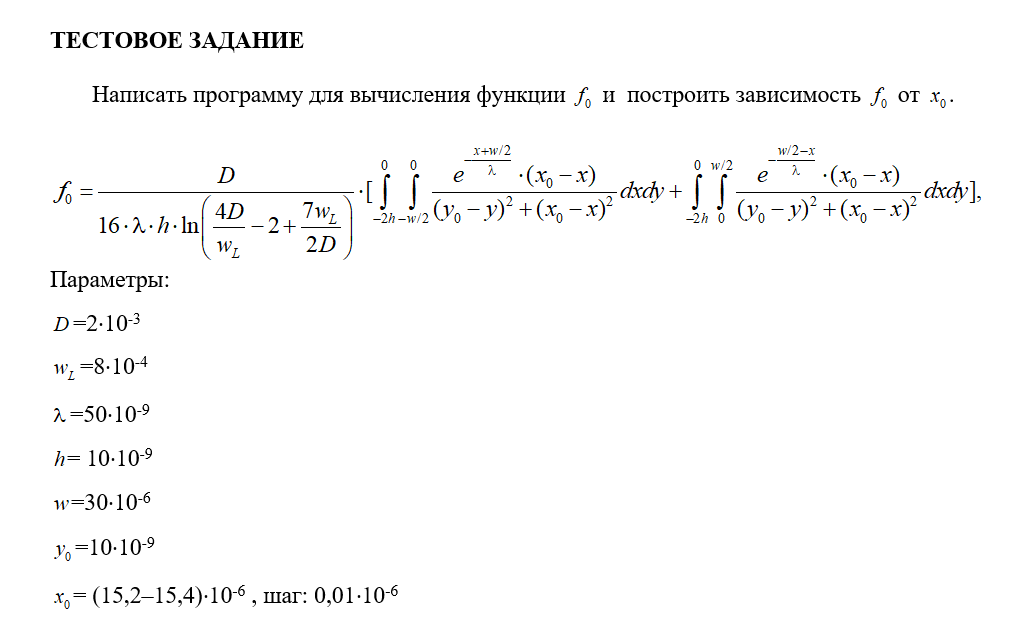

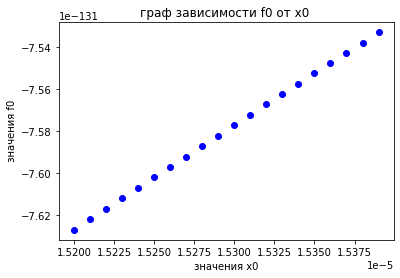

In [43]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# вычисление константа
def constant_term(D, la, h, wL):
    return D / ( 16*la*h* np.log( ( 4*D/wL) - 2 + (7*wL/2*D)))

# вычисление первого двойного интеграла
def first_doubleI(x, y):
    return np.exp(-((x + w/2)/la)) * ( x0 - x) / ( np.square(y0 - y) + np.square(x0 - x))
# вычисление второго двойного интеграла
def second_doubleI(x, y):
    return np.exp(-((w/2 - x)/la)) * ( x0 - x) / ( np.square(y0 - y) + np.square(x0 - x))

# пределы интеграла y
def bounds_y(h):
   return [-2*h, 0]

# пределы интеграла x1
def bounds_x1(w):
    return [-w/2, 0]

# пределы интеграла x2
def bounds_x2(w):
    return [0, w/2]

# Параметры
D = 2 * (10 ** -3)
wL = 8 * ( 10 ** -4)
la = 50 * ( 10 ** -9)
h = 10 *(10 ** -9)
w = 30 * (10 ** -6)
y0 = 10 * ( 10 ** -9) 

# вычисление константа
const_part = constant_term(D,la,h,wL)


start_x0  = 15.2 * ( 10 ** -6)
end_x0 = 15.4 * ( 10 ** -6)
step = 0.01 * ( 10 ** -6) # шаг

x0_values = np.arange(start_x0, end_x0, step ) 



f0_values = []
for i in range(len(x0_values)):
  x0 = x0_values[i]
  # вычисление значений f0 для всех х0
  Idxdy_1, err1 = integrate.nquad(first_doubleI, [bounds_x1, bounds_y(h)])
  Idxdy_2 , err2= integrate.nquad(second_doubleI, [bounds_x2, bounds_y(h)])
  f0_val = const_part * ( Idxdy_1 + Idxdy_2 )
  f0_values.append(f0_val)


plt.plot(x0_values, f0_values , 'bo')
plt.ylabel(' значения f0')
plt.xlabel('значения x0')
plt.title('граф зависимости f0 от x0 ')
plt.show()